In [2]:
# Verifying correctness of energy function

import utils
from hopfield import HopfieldNeuralNetwork
import numpy as np

mc = utils.MaxCut()
W = mc.get_adj_matrix('max_cut_data/MaxCut_50_156.txt')
print(W.shape)

Wn = np.diag(W)     # node weights
W = W - np.diag(Wn) # edge weights

# Bias vector in terms of node weights and edge weights
b = np.array(Wn)

hnn = HopfieldNeuralNetwork(weights=W)

x = -np.ones(hnn.n_neurons)
i_list = np.array([1, 3, 4, 5, 11, 14, 16, 19, 20, 21, 24, 25, 36, 37, 38, 39, 40, 43, 45, 48]) - 1
x[i_list] = 1
mc.energy(x, hnn.W)

max_cut_data/MaxCut_50_156.txt
(50, 50)


1762.0

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random

w = np.array([[0,1,1,0,0,0,0,0,0,0],
              [1,0,1,0,0,0,0,0,0,0],
              [1,1,0,1,0,0,0,0,0,0],
              [0,0,1,0,1,1,0,0,0,0],
              [0,0,0,1,0,1,0,0,0,0],
              [0,0,0,1,1,0,1,0,0,0],
              [0,0,0,0,0,1,0,1,1,0],
              [0,0,0,0,0,0,1,0,1,0],
              [0,0,0,0,0,0,1,1,0,1],
              [0,0,0,0,0,0,0,0,1,0]])
random.seed(1)
sample = random.sample(range(10), 5)
x = np.random.randint(2,size=(10,))
print(w[:,sample].shape, x[sample].shape)
w[:,sample] @ x[sample]

(10, 5) (5,)


array([2, 1, 1, 1, 0, 0, 0, 0, 0, 0])

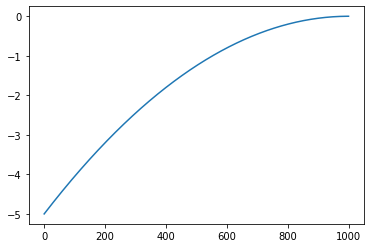

In [4]:
i = np.arange(1000)
plt.plot(i, -5*(1-i/1000)*(1-i/1000))

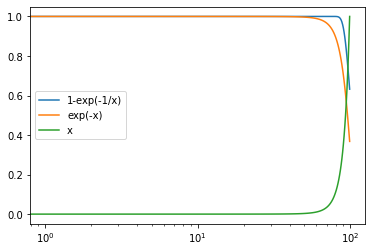

In [5]:
x = np.logspace(-5, 0, 100)
plt.plot(1-np.exp(-1/x))
plt.plot(np.exp(-x))
plt.plot(x)
plt.xscale('log')
plt.legend(['1-exp(-1/x)','exp(-x)', 'x'])

In [6]:
import numpy as np

class A:
  def __init__(self, weights):
    self.W = weights
    self.W_bar = np.sum(self.W) / (len(self.W) * (len(self.W)-1))
  
  def exp_weight(self, alpha):
    if alpha < 0: raise ValueError('alpha must be in the range [0, inf)')
    W_mod = self.W_bar + np.where(self.W>=self.W_bar, alpha/(np.exp(alpha/(self.W-self.W_bar)) - 1), -alpha/(np.exp(alpha/(self.W_bar-self.W)) - 1))
    return W_mod
w = np.array([0, 1, 25, -80, 0, 9, 111, -70, 0]).reshape(3,3)
a = A(w)
np.set_printoptions(suppress=True)
print(a.W)
print(a.exp_weight(1e5))

[[  0   1  25]
 [-80   0   9]
 [111 -70   0]]
[[-0.66666667 -0.66666667 -0.66666667]
 [-0.66666667 -0.66666667 -0.66666667]
 [-0.66666667 -0.66666667 -0.66666667]]


c:\Users\Asish\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


In [7]:
w_std = w # (w-w.min())/(w.max()-w.min())
w_ = np.sum(w_std) / ((len(w_std)-1))
print(w_)
print(w_std)
alpha = 1
print(w_ - alpha/(np.exp(alpha/(w_-w)) - 1))
_w_ = np.where(w>=w_, w_ + alpha/(np.exp(alpha/(w-w_) - 1)), w_ - alpha/(np.exp(alpha/(w_-w)) - 1))
print(_w_)
inv_w_ = _w_ * (w.max()-w.min()) + w.min()
# np.where(w>=w_, alpha/np.exp(alpha/(w-w_)), -alpha/np.exp(alpha/(w-w_)))

-2.0
[[  0   1  25]
 [-80   0   9]
 [111 -70   0]]
[[  0.54149408   1.52772647  25.50308635]
 [-79.50106837   0.54149408   9.50757471]
 [111.50073746 -69.50122549   0.54149408]]
[[ -0.35127873  -0.05226596   0.61944631]
 [-79.50106837  -0.35127873   0.48206508]
 [  0.69433236 -69.50122549  -0.35127873]]


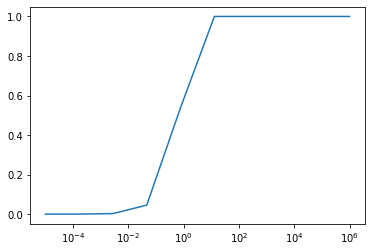

In [8]:
import matplotlib.pyplot as plt

x = np.logspace(6, -5, 10)
plt.plot(x, 1-np.exp(-x))
plt.xscale('log')

In [9]:
2.94373550e+057

2.9437355e+57

In [10]:
import numpy as np
from hopfield import MaxCutHopfieldNetwork

# Define the adjacency matrix of the graph
adjacency_matrix = np.array([[0, 1, 1, 0],
                             [1, 0, 1, 1],
                             [1, 1, 0, 1],
                             [0, 1, 1, 0]])

# Create an instance of the MaxCutHopfieldNetwork
max_cut_hn = MaxCutHopfieldNetwork(num_vertices=len(adjacency_matrix))

# Solve the Max Cut problem
best_cut, best_cut_edges = max_cut_hn.max_cut(adjacency_matrix)

# Print the best cut and the number of cut edges
print("Best Cut:", best_cut)
print("Number of Cut Edges:", best_cut_edges)

ImportError: cannot import name 'MaxCutHopfieldNetwork'

In [ ]:
from hopfield import HopfieldNetwork

# Define the patterns to be stored
patterns = [[ 1,  1,  1,  1,  1,  1],
            [-1, -1, -1, -1, -1, -1],
            [ 1, -1,  1, -1,  1, -1]]

# Create an instance of the Hopfield Network
hn = HopfieldNetwork(num_neurons=len(patterns[0]))

# Train the network with the patterns
hn.train(patterns)

# Define an input pattern to be recalled
input_pattern = [[-1, -1, 1, 1, 1, -1]]

# Recall the pattern using the trained network
output_pattern = hn.recall(input_pattern, steps=10)

# Print the recalled pattern
print(output_pattern)

tf.Tensor([[ 1. -1.  1. -1.  1. -1.]], shape=(1, 6), dtype=float32)


In [ ]:
import numpy as np

class HopfieldNetwork:
    def __init__(self, n):
        self.n = n
        self.weights = np.zeros((n, n))

    def train(self, patterns):
        for pattern in patterns:
            self.weights += np.outer(pattern, pattern)
        np.fill_diagonal(self.weights, 0)

    def predict(self, pattern):
        output = np.copy(pattern)
        while True:
            prev_output = np.copy(output)
            for i in range(self.n):
                inpt = np.dot(self.weights[i], output)
                output[i] = np.sign(inpt)
            if np.array_equal(output, prev_output):
                return output

In [ ]:
import asyncio

def background(f):
  def wrapped(*args, **kwargs):
    return asyncio.get_event_loop().run_in_executor(None, f, *args, **kwargs)
  return wrapped

Clearly Weight annealing is getting stuck in local minima. At 385

- Reduce learning rate
- Reduce batch size

In [ ]:
import numpy as np
from hopfield import HopfieldNeuralNetwork
import utils

# Define the adjacency matrix of the graph
adjacency_matrix = utils.get_adj_matrix('max_cut_data/MaxCut_50v2.mc')
print(adjacency_matrix.shape)

(50, 50)


```
num_epochs = 10000
alpha in np.logspace(5, -4, 10)
1414.0

num_epochs = 10000
alpha in np.logspace(5, -4, 100)
1567.0

num_epochs = 10000
alpha in np.logspace(6, -5, 500)
1519.0

num_epochs = 100000
alpha in np.logspace(6, -5, 500)
1573.0
```

In [ ]:
energies = np.zeros((10000, 100))

# Solve the Max Cut problem
def max_cut(adjacency_matrix, num_iterations=10000):

  hnn = HopfieldNeuralNetwork(num_neurons=len(adjacency_matrix), mode='ExponentialAnnealing')

  best_n_cut_edges = -1
  best_cut = None

  for epoch in range(num_iterations):
    hnn.train(adjacency_matrix)
    x_pred = np.random.choice([-1, 1], size=hnn.n_neurons)
    for it, t in zip(range(100), np.logspace(6, -5, 100)):
      y_pred = hnn.predict(x_pred, t=t)
      x_pred = y_pred
      # print(f"Iter {it}:", np.sum(adjacency_matrix * (np.ones((hnn.n_neurons, hnn.n_neurons)) - np.outer(y_pred, y_pred))) / 4)
      energies[epoch][it] = np.sum(adjacency_matrix * (np.ones((hnn.n_neurons, hnn.n_neurons)) - np.outer(y_pred, y_pred))) / 4
    
    n_cut_edges = np.sum(adjacency_matrix * (np.ones((hnn.n_neurons, hnn.n_neurons)) - np.outer(y_pred, y_pred))) / 4
    
    if n_cut_edges > best_n_cut_edges:
      best_n_cut_edges = n_cut_edges
      best_cut = y_pred
  
  return best_cut, best_n_cut_edges

# Print the best cut and the number of cut edges
best_cut, best_n_cut_edges = max_cut(adjacency_matrix)
print("Best Cut:", best_cut)
print("Number of Cut Edges:", best_n_cut_edges)

d:\Downloads\papers, books and stuff\mem-HNNs\hopfield.py:46: RuntimeWarning: divide by zero encountered in true_divide
  W_modified = np.where(self.W >= self.W_bar, alpha/(np.exp(alpha/(self.W - self.W_bar)) - 1), -alpha/(np.exp(alpha/(self.W - self.W_bar)) - 1))
d:\Downloads\papers, books and stuff\mem-HNNs\hopfield.py:46: RuntimeWarning: overflow encountered in exp
  W_modified = np.where(self.W >= self.W_bar, alpha/(np.exp(alpha/(self.W - self.W_bar)) - 1), -alpha/(np.exp(alpha/(self.W - self.W_bar)) - 1))


Best Cut: [ 1 -1  1 -1 -1  1 -1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1 -1
  1 -1 -1  1  1 -1  1 -1 -1  1 -1  1  1 -1  1  1  1 -1 -1 -1  1  1 -1 -1
 -1  1]
Number of Cut Edges: 1131.0


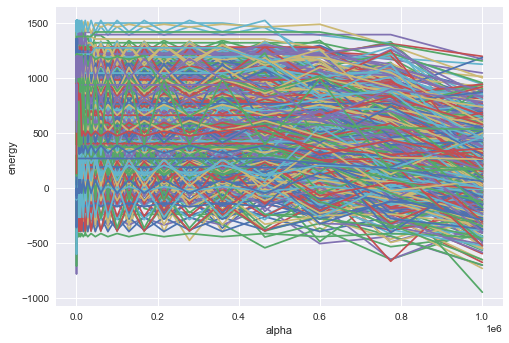

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('seaborn')

for i in range(1000):
  plt.plot(np.logspace(6, -5, 100), energies[i])
plt.xlabel('alpha')
plt.ylabel('energy')
plt.show()

In [ ]:
# Solve the Max Cut problem
def max_cut_exponential_weight_annealing(adjacency_matrix, num_iterations=100):

  # Create an instance of the HopfieldNeuralNetwork with stochastic neurons
  hnn = HopfieldNeuralNetwork(num_neurons=len(adjacency_matrix), mode='Hybrid')

  best_n_cut_edges = -1
  best_cut = None

  for _ in range(num_iterations):
    hnn.train(adjacency_matrix)
    x_pred = np.random.choice([-1, 1], size=hnn.n_neurons)
    for it in [1e5, 1e4, 1e3, 1e2, 1e1, 1e0, 1e-1, 1e-2, 1e-3, 1e-4]:
      y_pred = hnn.predict(x_pred, T=it, t=it)
      x_pred = y_pred
      print(f"Iter {it}:", np.sum(adjacency_matrix * (np.ones((hnn.n_neurons, hnn.n_neurons)) - np.outer(y_pred, y_pred))) / 4)
    
    n_cut_edges = np.sum(adjacency_matrix * (np.ones((hnn.n_neurons, hnn.n_neurons)) - np.outer(y_pred, y_pred))) / 4
    
    if n_cut_edges > best_n_cut_edges:
      best_n_cut_edges = n_cut_edges
      best_cut = y_pred

  return best_cut, best_n_cut_edges

# Print the best cut and the number of cut edges
best_cut, best_n_cut_edges = max_cut_exponential_weight_annealing(adjacency_matrix)
print("Best Cut:", best_cut)
print("Number of Cut Edges:", best_n_cut_edges)

Iter 100000.0: 7.0
Iter 10000.0: -80.0
Iter 1000.0: -6.0
Iter 100.0: 603.0
Iter 10.0: 432.0
Iter 1.0: 427.0
Iter 0.1: 630.0
Iter 0.01: 417.0
Iter 0.001: 264.0
Iter 0.0001: 264.0
Iter 100000.0: 440.0
Iter 10000.0: 243.0
Iter 1000.0: 228.0
Iter 100.0: 535.0
Iter 10.0: 186.0
Iter 1.0: 100.0
Iter 0.1: 201.0
Iter 0.01: 193.0
Iter 0.001: 193.0
Iter 0.0001: 193.0
Iter 100000.0: -87.0
Iter 10000.0: -259.0
Iter 1000.0: -41.0
Iter 100.0: 564.0
Iter 10.0: 92.0
Iter 1.0: 11.0
Iter 0.1: 203.0
Iter 0.01: 235.0
Iter 0.001: 235.0
Iter 0.0001: 235.0
Iter 100000.0: -255.0
Iter 10000.0: -638.0
Iter 1000.0: 145.0
Iter 100.0: 31.0
Iter 10.0: 220.0
Iter 1.0: 112.0
Iter 0.1: 112.0
Iter 0.01: 112.0
Iter 0.001: 112.0
Iter 0.0001: 112.0
Iter 100000.0: -214.0
Iter 10000.0: 226.0
Iter 1000.0: 458.0
Iter 100.0: 361.0
Iter 10.0: 355.0
Iter 1.0: 136.0
Iter 0.1: 50.0
Iter 0.01: -162.0
Iter 0.001: 49.0
Iter 0.0001: 175.0
Iter 100000.0: -92.0
Iter 10000.0: 475.0
Iter 1000.0: -133.0
Iter 100.0: 18.0
Iter 10.0: 475.0
Ite

In [ ]:
# Solve the Max Cut problem
def max_cut_exponential_weight_annealing(adjacency_matrix, num_iterations=1000):

  # Create an instance of the HopfieldNeuralNetwork with stochastic neurons
  hnn = HopfieldNeuralNetwork(num_neurons=len(adjacency_matrix), mode='SemiExponentialAnnealing')

  best_n_cut_edges = -1
  best_cut = None

  for _ in range(num_iterations):
    hnn.train(adjacency_matrix)
    x_pred = np.random.choice([-1, 1], size=hnn.n_neurons)
    for it in np.linspace(0, 1, 101):
      y_pred = hnn.predict(x_pred, t=it)
      x_pred = y_pred
      print(f"Iter {it}:", np.sum(adjacency_matrix * (np.ones((hnn.n_neurons, hnn.n_neurons)) - np.outer(y_pred, y_pred))) / 4)
    
    n_cut_edges = np.sum(adjacency_matrix * (np.ones((hnn.n_neurons, hnn.n_neurons)) - np.outer(y_pred, y_pred))) / 4
    
    if n_cut_edges > best_n_cut_edges:
      best_n_cut_edges = n_cut_edges
      best_cut = y_pred

  return best_cut, best_n_cut_edges

# Print the best cut and the number of cut edges
best_cut, best_n_cut_edges = max_cut_exponential_weight_annealing(adjacency_matrix)
print("Best Cut:", best_cut)
print("Number of Cut Edges:", best_n_cut_edges)

Iter 0.0: 0.0
Iter 0.01: 398.0
Iter 0.02: -218.0
Iter 0.03: 349.0
Iter 0.04: 132.0
Iter 0.05: 385.0
Iter 0.06: 132.0
Iter 0.07: 385.0
Iter 0.08: 132.0
Iter 0.09: 385.0
Iter 0.1: 132.0
Iter 0.11: 385.0
Iter 0.12: 132.0
Iter 0.13: 385.0
Iter 0.14: 132.0
Iter 0.15: 385.0
Iter 0.16: 132.0
Iter 0.17: 385.0
Iter 0.18: 132.0
Iter 0.19: 385.0
Iter 0.2: 132.0
Iter 0.21: 385.0
Iter 0.22: 132.0
Iter 0.23: 385.0
Iter 0.24: 132.0
Iter 0.25: 385.0
Iter 0.26: 132.0
Iter 0.27: 385.0
Iter 0.28: 132.0
Iter 0.29: 385.0
Iter 0.3: 132.0
Iter 0.31: 385.0
Iter 0.32: 132.0
Iter 0.33: 385.0
Iter 0.34: 132.0
Iter 0.35000000000000003: 385.0
Iter 0.36: 132.0
Iter 0.37: 385.0
Iter 0.38: 132.0
Iter 0.39: 385.0
Iter 0.4: 132.0
Iter 0.41000000000000003: 385.0
Iter 0.42: 132.0
Iter 0.43: 385.0
Iter 0.44: 132.0
Iter 0.45: 385.0
Iter 0.46: 132.0
Iter 0.47000000000000003: 385.0
Iter 0.48: 132.0
Iter 0.49: 385.0
Iter 0.5: 132.0
Iter 0.51: 385.0
Iter 0.52: 132.0
Iter 0.53: 385.0
Iter 0.54: 132.0
Iter 0.55: 385.0
Iter 0.56:

In [ ]:
# Solve the Max Cut problem
def max_cut_stochastic_simulated_annealing(adjacency_matrix, num_iterations=1000):

  # Create an instance of the HopfieldNeuralNetwork with stochastic neurons
  hnn = HopfieldNeuralNetwork(num_neurons=len(adjacency_matrix), mode='StochasticSimulatedAnnealing')

  best_n_cut_edges = -1
  best_cut = None

  for _ in range(num_iterations):
    hnn.train(adjacency_matrix)
    x_pred = np.random.choice([-1, 1], size=hnn.n_neurons)
    for it in range(100):
      y_pred = hnn.predict(x_pred, T=0.8**it)
      x_pred = y_pred
    
    n_cut_edges = np.sum(adjacency_matrix * (np.ones((hnn.n_neurons, hnn.n_neurons)) - np.outer(y_pred, y_pred))) / 4
    
    if n_cut_edges > best_n_cut_edges:
      best_n_cut_edges = n_cut_edges
      best_cut = y_pred

  return best_cut, best_n_cut_edges

# Print the best cut and the number of cut edges
best_cut, best_n_cut_edges = max_cut_stochastic_simulated_annealing(adjacency_matrix)
print("Best Cut:", best_cut)
print("Number of Cut Edges:", best_n_cut_edges)

d:\Downloads\papers, books and stuff\mem-HNNs\hopfield.py:116: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-x))


Best Cut: [-1  1  1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1
 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1
  1 -1]
Number of Cut Edges: 1210.0


In [ ]:
count = 0
arr = best_cut
print(np.where(arr == -1)[0] + 1)
for i in np.where(arr == -1)[0]:
  for j in np.where(arr == 1)[0]:
    count += adjacency_matrix[i, j]
print(count)
print(np.sum(adjacency_matrix * (np.ones_like(arr) - np.outer(arr, arr))) / 4)

[ 1  4  6  7  8  9 11 13 14 15 16 17 22 23 24 25 27 28 29 30 31 32 33 34
 37 41 42 43 44 46 47 48 50]
1210.0
1210.0


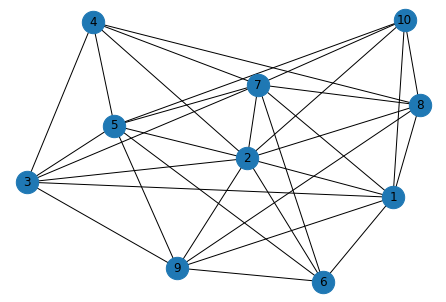

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_graph(adjacency_matrix, mylabels):
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=500, labels=mylabels, with_labels=True)
    plt.show()

plot_graph(adjacency_matrix, {i: i+1 for i in range(len(adjacency_matrix))})